# Chapter 6 DBSCAN for anomaly detection

# The Moons Dataset

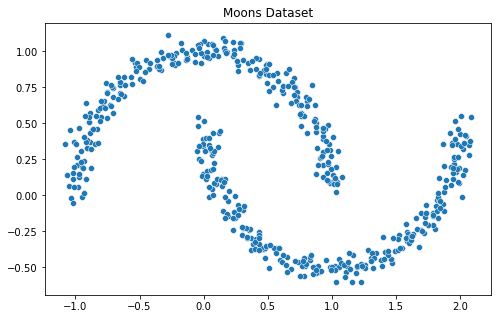

In [14]:
# Import necessary libraries
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the moon dataset with noise
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:,0], y=X[:,1])
plt.title('Moons Dataset')
plt.show()

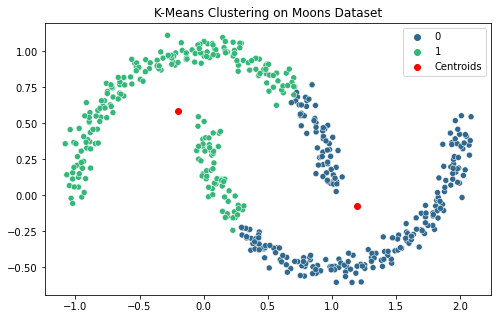

In [6]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Define the K-Means model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(X)

# Predict the cluster labels
labels_kmeans = kmeans.predict(X)

# Visualize the K-Means clustering result
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_kmeans, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', label='Centroids')
plt.title('K-Means Clustering on Moons Dataset')
plt.legend()
plt.show()

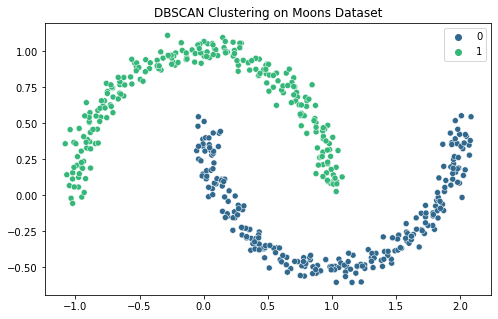

In [7]:
# Import necessary libraries
from sklearn.cluster import DBSCAN

# Define the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit the model and predict the cluster labels
labels_dbscan = dbscan.fit_predict(X)

# Visualize the DBSCAN clustering result
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_dbscan, palette='viridis')
plt.title('DBSCAN Clustering on Moons Dataset')
plt.show()

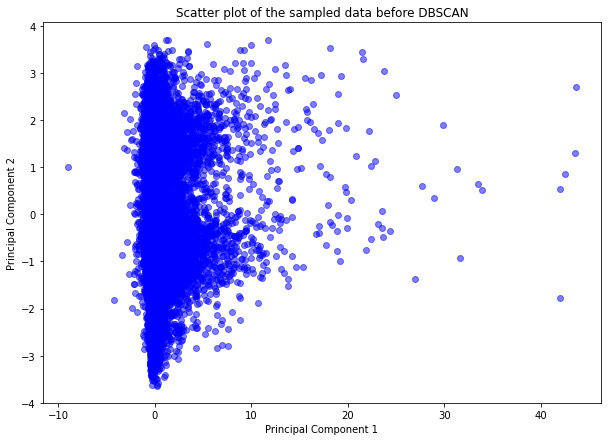

In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Take a sample of the data
data_sample = data.sample(frac=0.2, random_state=41)

# Separate out the features and labels
X = data_sample.drop('Class', axis=1)
y = data_sample['Class']

# Standardize the features to have a mean of ~0 and a variance of 1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA to reduce dimensions 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c='blue', alpha=0.5)
plt.title('Scatter plot of the sampled data before DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Estimated number of clusters: 14
Estimated number of noise points: 251


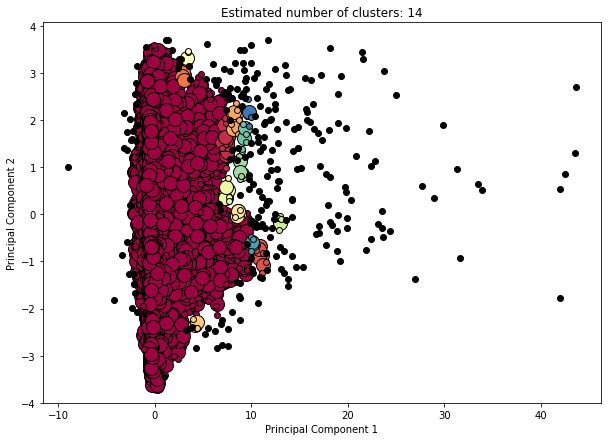

In [31]:
from sklearn.cluster import DBSCAN

# Define the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit and predict the labels
labels = dbscan.fit_predict(X_pca)

# Identify the core and outlier samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Get the number of clusters (ignoring noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

# Plot the data, color code by DBSCAN cluster assignment
plt.figure(figsize=(10,7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black used for noise.
    class_member_mask = (labels == k)

    xy = X_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [35]:
# Create a cross-tabulation table
crosstab = pd.crosstab(data_sample['Class'], data_sample['anomaly'])

In [36]:
crosstab

anomaly,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Class,,,,,,,,,,,,,,,
0,250,56515,19,12,5,14,5,6,4,9,5,7,7,5,4
1,1,93,0,0,0,0,0,0,0,0,0,0,0,0,0
